# IMPORTS

In [121]:
%run notebook_setup.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [330]:
%run wish_dataset_2_class_def.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# implement text search

In [331]:
d=Dataset()

In [10]:
d.raw.head(1).transpose()

,0
title,2020 Summer Vintage Flamingo Print Pajamas Se...
title_orig,2020 Summer Vintage Flamingo Print Pajamas Se...
price,16.0
retail_price,14
currency_buyer,EUR
units_sold,100
uses_ad_boosts,0
rating,3.76
rating_count,54
rating_five_count,26.0


In [223]:
d.df.head(2)

,title,title_orig,price,retail_price,units_sold,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,tags,product_color,merchant_title,merchant_name,merchant_rating_count,merchant_rating,product_picture
0,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,16.0,14,100,3.76,54,26.0,8.0,10.0,1.0,9.0,"Summer,Fashion,womenunderwearsuit,printedpajamasset,womencasualshort,Women's Fashion,flamingo,loungewearset,Casual,Shirt,casualsleepwear,Shorts,flamingotshirt,Elastic,Vintage,Tops,tshirtandshortsset,Women,Sleepwear,Print,womenpajamasset,womennightwear,Pajamas,womensleepwearset",white,zgrdejia,zgrdejia,568,4.128521,https://contestimg.wish.com/api/webimage/5e9ae51d43d6a96e303acdb0-medium.jpg
1,SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,20000,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,"Mini,womens dresses,Summer,Patchwork,fashion dress,Dress,Mini dress,Women's Fashion,Women S Clothing,backless,party,summer dresses,sleeveless,sexy,Casual",green,SaraHouse,sarahouse,17752,3.899673,https://contestimg.wish.com/api/webimage/58940d436a0d3d5da4e95a38-medium.jpg


### build up regex

In [224]:
import re

In [27]:
d.df['title'].str.lower().str.contains('summer|hot')

0        True
1        True
2       False
3        True
4       False
        ...  
1565    False
1567    False
1568    False
1570     True
1572    False
Name: title, Length: 1341, dtype: bool

In [118]:
d.df['title'].str.contains('womens|me|dress|banana',flags=re.IGNORECASE,regex=True)

0       True
1       True
2       True
3       True
4       True
        ... 
1565    True
1567    True
1568    True
1570    True
1572    True
Name: title, Length: 1341, dtype: bool

In [227]:
pd.concat(
    [
        d.df['title'],
        d.df['title'].str.contains('sans',flags=re.IGNORECASE,regex=True)+0
    ],
    axis=1,
)[:20]

,title,title
0,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,0
1,SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21,1
2,2020 Nouvelle Arrivée Femmes Printemps et Été Plage Porter Longue Mince Cardigan Ouvert Avant Kimono Vert Feuille Imprimé En Mousseline de Soie Cardigan S-5XL,0
3,Hot Summer Cool T-shirt pour les femmes Mode Tops Abeille Lettres imprimées Manches courtes O Neck Coton T-shirts Tops Tee Vêtements,0
4,"Femmes Shorts d'été à lacets taille élastique lâche mince pantalon décontracté, plus la taille S-8XL",0
5,Plus la taille d'été femmes décontracté sans manches barboteuses combinaisons combinaison de couleur unie jarretelles pantalons lâche salopette,1
6,Women Fashion Loose Lace Blouse Blouse V Neck Bat Sleeves T Shirt Hollow Out Tops Plus Grande Taille XS-8XL,0
7,Robe tunique ample femme Robe d'été Robe en jean Robe chemise en jean Robe droite,0
8,Robe d'été décontractée à manches courtes pour femmes,0
9,"Femmes d'été, plus la taille décontractée lâche col en V à manches courtes imprimé floral Blouse Tops",0


### combine description / tag columns to do single regex on

In [18]:
d.df[['title','title_orig','tags']].apply(lambda x:x['title']+x['title_orig']+x['tags'],axis=1)

0       2020 Summer Vintage Flamingo Print  Pajamas Se...
1       SSHOUSE Summer Casual Sleeveless Soirée Party ...
2       2020 Nouvelle Arrivée Femmes Printemps et Été ...
3       Hot Summer Cool T-shirt pour les femmes Mode T...
4       Femmes Shorts d'été à lacets taille élastique ...
                              ...                        
1565    Nouveau Pantalon De Mode D'été Femmes Leggings...
1567    Combinaison sans manches pour femmes couleur u...
1568    Nouvelle Mode Femmes Bohême Pissenlit Imprimer...
1570    Nouveautés Hommes Siwmwear Beach-Shorts Hommes...
1572    Pantalon de yoga pour femmes à la mode Slim Fi...
Length: 1341, dtype: object

# FUNCTIONS TO BUILD UP QUERY

In [ ]:
from typing import List

### search string tokenizer

In [110]:
SEARCH_STRING = str
SEARCH_TOKENS = List[str]
def tokenize_search_string(search_string : SEARCH_STRING) -> SEARCH_TOKENS :
    tokens = re.split('\W+',search_string) # partition string on non-alphanumeric chars
    tokens = [token.lower() for token in tokens] # set tokens to lower case
    tokens = list(set(tokens)) # return uniques only
    return tokens

tokenize_search_string('absc#dd	ddd  ,#,      asd;f    asdf asdf asdf asdf asdf asdfsd000_22220')
tokenize_search_string('womens banana    dress dress me me me')

['womens', 'me', 'dress', 'banana']

### build up regex pattern from search string tokens

In [113]:
def search_tokens_to_re_pattern(search_tokens : SEARCH_TOKENS) -> str :
    return '|'.join(search_tokens)

search_tokens_to_re_pattern(
    tokenize_search_string('womens banana    dress dress me me me')
)

'womens|me|dress|banana'

### simple way to get description + tags to regex over

In [406]:
d.df[['title','title_orig','tags','product_color']]

,title,title_orig,tags,product_color
0,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,"Summer,Fashion,womenunderwearsuit,printedpajamasset,womencasualshort,Women's Fashion,flamingo,loungewearset,Casual,Shirt,casualsleepwear,Shorts,flamingotshirt,Elastic,Vintage,Tops,tshirtandshortsset,Women,Sleepwear,Print,womenpajamasset,womennightwear,Pajamas,womensleepwearset",white
1,SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21,Women's Casual Summer Sleeveless Sexy Mini Dress,"Mini,womens dresses,Summer,Patchwork,fashion dress,Dress,Mini dress,Women's Fashion,Women S Clothing,backless,party,summer dresses,sleeveless,sexy,Casual",green
2,2020 Nouvelle Arrivée Femmes Printemps et Été Plage Porter Longue Mince Cardigan Ouvert Avant Kimono Vert Feuille Imprimé En Mousseline de Soie Cardigan S-5XL,2020 New Arrival Women Spring and Summer Beach Wear Long Thin Cardigan Open Front Kimono Green Leaf Printed Chiffon Cardigan S-5XL,"Summer,cardigan,women beachwear,chiffon,Sexy women,Coat,summercardigan,openfront,short sleeves,Swimsuit,Women's Fashion,leaf,Green,printed,Spring,longcardigan,Women,Beach,kimono",leopardprint
3,Hot Summer Cool T-shirt pour les femmes Mode Tops Abeille Lettres imprimées Manches courtes O Neck Coton T-shirts Tops Tee Vêtements,Hot Summer Cool T Shirt for Women Fashion Tops Bee Printed Letters Short Sleeve O Neck Cotton T-shirts Tops Tee Clothing,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,printedletterstop,Clothing,Tops,Necks,short sleeves,Women's Fashion,Women Clothing,printed,Women,tshirtforwomen,Fashion,T Shirts,Shirt",black
4,"Femmes Shorts d'été à lacets taille élastique lâche mince pantalon décontracté, plus la taille S-8XL",Women Summer Shorts Lace Up Elastic Waistband Loose Thin Casual Pants Plus Size S-8XL,"Summer,Plus Size,Lace,Casual pants,Bottom,pants,Loose,Women's Fashion,Shorts,Lace Up,Elastic,Casual,Women",yellow
...,...,...,...,...
1565,Nouveau Pantalon De Mode D'été Femmes Leggings Pantalon Déchiré Pantalon Mince Armée Vert Collants Pantalon,New Summer Fashion Trousers Women Leggings Ripped Pants Slim Pants Army Green Tights Pants,"Summer,Leggings,Fashion,high waist,pants,slim,Women's Fashion,trousers,Green,Army,Women",skyblue
1567,Combinaison sans manches pour femmes couleur unie Dames Slim Short Bodycon Rompers Femmes Body,Sleeveless Solid Color Women Jumpsuit Ladies Slim Short Bodycon Rompers Women Bodysuit,"bodycon jumpsuits,nightwear,Shorts,slim,Body Suit,shortjumpsuit,Women,vestido,Ladies,sleeveless,sexy,Rompers,Casual,jumpsuit",black
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer Tee Shirt Lady Fille T-shirt À Manches Courtes Boho Graphique Tee Casual Yoga Top Plus La Taille,New Fashion Women Bohemia Dandelion Print Tee Shirt Lady Girl Short Sleeve T-shirt Boho Graphic Tee Casual Yoga Top Plus Size,"bohemia,Plus Size,dandelionfloralprinted,short sleeves,yoga top,bohotshirt,Cool T-Shirts,Women's Fashion,Fashion,short sleeve shirt,Casual,Women,Shorts,Yoga,Shirt,Sleeve,graphic tee,Tee Shirt,T Shirts,boho,bohoshirt,Print,Casual Tops,Tops",navyblue
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes Summer Short de bain court à séchage rapide Beach-Wear Sports,New Men Siwmwear Beach-Shorts Men Summer Quick-Dry Short Swim-Shorts Beach-Wear Sports,"runningshort,Beach Shorts,beachpant,menbeachshort,Men,sailboatshort,beach swimwear,Men's Fashion,Shorts,Summer,men's shorts,Sport",white


In [411]:
def merged_product_identifier_text() -> pd.Series(dtype='str') :
    descriptor_colnames = ['title','title_orig','tags','product_color']
    df_descriptors      = d.df[descriptor_colnames]
    return df_descriptors.apply(lambda x:'|'.join([str(x) for x in x.values]),axis=1)

merged_product_identifier_text()

0       2020 Summer Vintage Flamingo Print  Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets|2020 Summer Vintage Flamingo Print  Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets|Summer,Fashion,womenunderwearsuit,printedpajamasset,womencasualshort,Women's Fashion,flamingo,loungewearset,Casual,Shirt,casualsleepwear,Shorts,flamingotshirt,Elastic,Vintage,Tops,tshirtandshortsset,Women,Sleepwear,Print,womenpajamasset,womennightwear,Pajamas,womensleepwearset|white
1                                                                                                                                                                                                                                 SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21|Women's Casual Summer Sleeveless Sexy Mini Dress|Mini,womens dresses,Summer,Patchwork

### count how many tokens found in each product description / tags

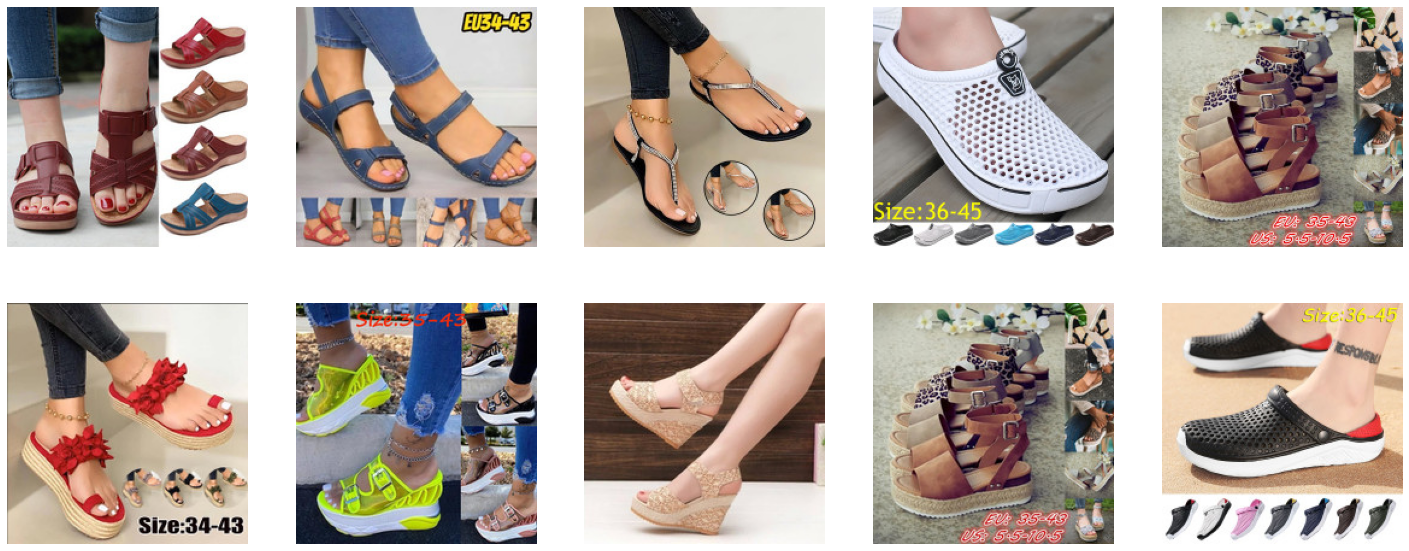

,discounted(tokens matched),discounted(sandal),discounted(red),tokens matched,sandal,red,0
403,1.888143,0.988069,0.900075,2,True,True,"Women Summer New Flip Flops Sandals Beach Shoes Slipper Shoes Comfortable Open Toe Sandals Vintage Anti-slip Breathable Summer Casual Shoes Plus Size |Women Summer New Flip Flops Sandals Beach Shoes Slipper Shoes Comfortable Open Toe Sandals Vintage Anti-slip Breathable Summer Casual Shoes Plus Size |Summer,Flip Flops,Sandals,Vintage,antislip,Slippers,Women's Fashion,open toe,Shoes,Plus Size,Beach,Casual,Women|red"
136,0.988069,0.988069,0.000000,1,True,False,"Femmes Casual Round Open Toe Sandals Female Slippers Vintage Orthopedic Buckle Strap Anti-slip Respirant Summer Beach Sandals Roman Gladiator|Women Casual Round Open Toe Sandals Female Slippers Vintage Orthopedic Buckle Strap Anti-slip Breathable Summer Beach Sandals Roman Gladiator|slidesforwomen,sandalendamen,Sandals,Platform Shoes,Summer,Vintage,sandalswomen,Buckles,summer shoes,Women's Fashion,flatshoesforwoman,sandalefemme,sandaliasmujer,Roman,open toe,Casual,Women,Beach,wedgesshoeswomen,Slippers,slippers for women|grey"
139,0.988069,0.988069,0.000000,1,True,False,"2020 nouvelles femmes d'été loisirs vacances chaussures plates forage chaud tongs sandales|2020 New Women's Summer Leisure Holiday Flat Shoes Hot Drilling Flip-flops Sandals|Summer,Flip Flops,hotrhinestone,Womens Shoes,Vacation,new2020,Slippers,flipflopsandal,Sandals,Shoes,casualsandal,Holiday,flat shoe|silver"
191,0.988069,0.988069,0.000000,1,True,False,"2019 Chaussures de plage d'été Couple Sandales Ventilatives Chaussures Casual Chaussures Chaussures Chaussons|2019 Summer Beach Shoes Couple Ventilative Sandals Casual Shoes Slippers|Summer,Flip Flops,Outdoor,Breathable,Slippers,unisex,Fashion,Shoes,Sandals,Sport,Beach,Casual|black"
215,0.988069,0.988069,0.000000,1,True,False,"2019 Femmes Open Toe orteil Braid Braid Strap Strap Strap Platform Sandales Sandales Ajustable Boucle Boucle Semelle Rubble Semelle Rubble Chaussures d'été Cute Espadrille|2019 Women Open Toe Ankle Braid Strap Straw Platform Sandals Adjustable Buckle Wedge Rubble Sole Summer Shoes Cute Espadrille|wedge,Sandals,Summer,antislip,espadrille,Slippers,Platform,Women's Fashion,open toe,cute,Shoes,Ankle,women shoes,Braids,Beach,Buckles,Women|leopard"
675,0.988069,0.988069,0.000000,1,True,False,"NOUVEAU Mode Femmes Fleur Slip Sur Plate-Forme Sandales Pantoufles Chaussures De Plage Cales Sandales D'été Casual Chaussures Plus La Taille|NEW Fashion Women Flower Slip On Platform Sandals Slippers Beach Shoes Wedges Sandals Summer Casual Shoes Plus Size|beach shoes,fashion women,Plus Size,Women Sandals,Fashion,bohemiasandal,Beach,Flowers,platformsandal,wedgessandal,nonslipslipper,womenshoessummer,sandals for women,Sandals,Summer,Shoes,Women,Women's Fashion,Casual,Slippers,slippers for women|grey"
825,0.988069,0.988069,0.000000,1,True,False,"2020 nouveau 3 couleurs mode femmes pantoufles creux sandales compensées d'été patchwork pantoufles pantoufles augmentées|2020 New 3 Colors Fashion Female Slippers Hollow Wedge Sandals Summer Patchwork Slippers Increased Slippers|heightenedshoe,wedge,Sandals,casual shoes,High Heel,Slippers,Women's Fashion,Fashion,Summer,Wedge Sandals|black"
981,0.988069,0.988069,0.000000,1,True,False,"Femmes Chaussures D'été Nouveau À Bout Ouvert Poisson Tête Plate-Forme Sandales De Mode Talons Hauts Compensées Sandales|Women Shoes Summer New Open Toe Fish Head Platform Sandals Fashion High Heels Wedges Sandals|beach shoes,sandalendamen,Sandals,Fashion,Womens Shoes,Summer,sandalswomen,summer shoes,platformsandal,wedgessandal,sandalefemme,Women's Fashion,open toe,High Heel,Women,Head,fish,Heels,Shoes|beige"
1084,0.988069,0.988069,0.000000,1,True,False,"Femmes d'été décontracté plate-forme sandales compensées à bout ouvert chaussures bride à la cheville sandales grande taille 35-43|Women Summer Casual Platform Wedge Sandals Open Toe Shoes Ankle Strap Sandals Plus Size 35-43|wedge,sandals for women

In [412]:
# weighted token search
# looking at all string product identifiers (title, titie_orig, tags)
# return weighted value of tokens found (e.g. 3x 2x 1x)
def tokens_found_count(
    pd_series     : pd.Series(dtype='str'),
    search_tokens : SEARCH_TOKENS,
    top_n         : int = 5,
    verbose       : int = 0, # show workings
    ) -> pd.Series(dtype='int') :
    ###########################################################
    # identify which tokens matched
    ###########################################################
    # list of series with Trues/Falses
    found_count_list = [pd_series.str.contains(token,flags=re.IGNORECASE,regex=True) for token in search_tokens]
    
    # df of Trues/Falses
    found_count_df = pd.concat(found_count_list,axis=1)
    found_count_df.columns = search_tokens
    
    # series of found cfound_count_series
    found_count_series = found_count_df.sum(axis=1)
    found_count_series.name = 'tokens_found_count'
    
    ###########################################################
    # token rarity
    ###########################################################
    # count rarity of token - rare tokens should be valued more
    token_found_count = found_count_df.sum()
    token_rarity = 1 - token_found_count / len(found_count_df) # rare tokens are valued more, only 1 instance (value ~= 1), 50% of products (value = 50%), 100% of products (value ~= 0)
    discounted_token_df = found_count_df * token_rarity # impact token found bool with value of token (between 0 and 1)
    discounted_token_series = discounted_token_df.sum(axis=1)
    discounted_token_df.columns = ['discounted('+x+')' for x in discounted_token_df.columns] # rename df columns so result can exist in same df
    
    ###########################################################
    # give feedback if token not found
    ###########################################################
    if verbose>1: print('token_found_count');display(token_found_count)
    unmatched_tokens = token_found_count[token_found_count==0]
    
    pad_string = lambda s : '\'' + s + '\''
    
    # only give feedback if there are useless tokens
    if len(unmatched_tokens)>0:
        useless_tokens = [pad_string(s) for s in unmatched_tokens.index]
        if verbose>1: display(useless_tokens)
        if len(useless_tokens)==1:
            helpful_string = useless_tokens[0]
        else:
            helpful_string = ', '.join(useless_tokens[:-1]) + ' and ' + useless_tokens[-1]

        # show helping string
        print(f'searchbot: no matches for {helpful_string}, try looking for something else')
        print()

    ###########################################################
    # make pretty return df
    ###########################################################
    # [ found count ] + [ which tokens found ] + [search string]
    found_count_summary = pd.concat(
        [
            discounted_token_series.to_frame('discounted(tokens matched)'),
            discounted_token_df,
            found_count_series.to_frame('tokens matched'),
            found_count_df,
            pd_series.to_frame()
        ],
        axis=1
    )
    
    # snip results table to stuff which has at least SOME match
    found_count_summary = found_count_summary[found_count_summary['tokens matched']>0]
    # sort on some metric
    found_count_summary = found_count_summary.sort_values(['tokens matched']+search_tokens,ascending=False)

    ###########################################################
    # results chat
    ###########################################################
    if len(found_count_summary)==0:
        print(f'results: I got nothing! T⌓T')
    elif len(found_count_summary)==1:
        print(f'results: only 1 hit ￣ω￣, I hope it\'s what you wanted!')
    elif len(found_count_summary)<10:
        print(f'results: {len(found_count_summary)} items found, I can do better if you can be more specific')
    
    
    '''
    # tag on searched string as well for debug purposes
    if verbose>0:
        found_count_summary = found_count_summary.join(pd_series.to_frame())
    ''' 
    
    ###########################################################
    # plot top_n results
    ###########################################################
    if len(found_count_summary)>0:
        d.get_product_pictures(locs=found_count_summary.index[:top_n])
        plt.show()

    ###########################################################
    # return
    ###########################################################
    if verbose>0:
        return found_count_summary
    else:
        return found_count_summary.head(top_n)

#tokens_found_count(merged_product_identifier_text(),['summer','short'],verbose=1).head(10) # basic logic
#tokens_found_count(merged_product_identifier_text(),['harajuku','goth','sexy'],verbose=1).head(10) # test rare token logic
#tokens_found_count(merged_product_identifier_text(),['kids','top','banana','bobby','henry'],verbose=0).head(10) # test bad search tokens
#tokens_found_count(merged_product_identifier_text(),['kids','sandals'],verbose=0).head(10) # test
#tokens_found_count(merged_product_identifier_text(),['balloon'],top_n=5,verbose=0) # test top_n
#tokens_found_count(merged_product_identifier_text(),['balloon'],top_n=10,verbose=1).head(20) # test results snipping
#tokens_found_count(merged_product_identifier_text(),['banana'],top_n=10,verbose=1).head(20) # test results chat
tokens_found_count(merged_product_identifier_text(),['sandal'],top_n=10,verbose=1).head(20) # test results chat
tokens_found_count(merged_product_identifier_text(),['sandal','red'],top_n=10,verbose=1).head(20) # test results chat

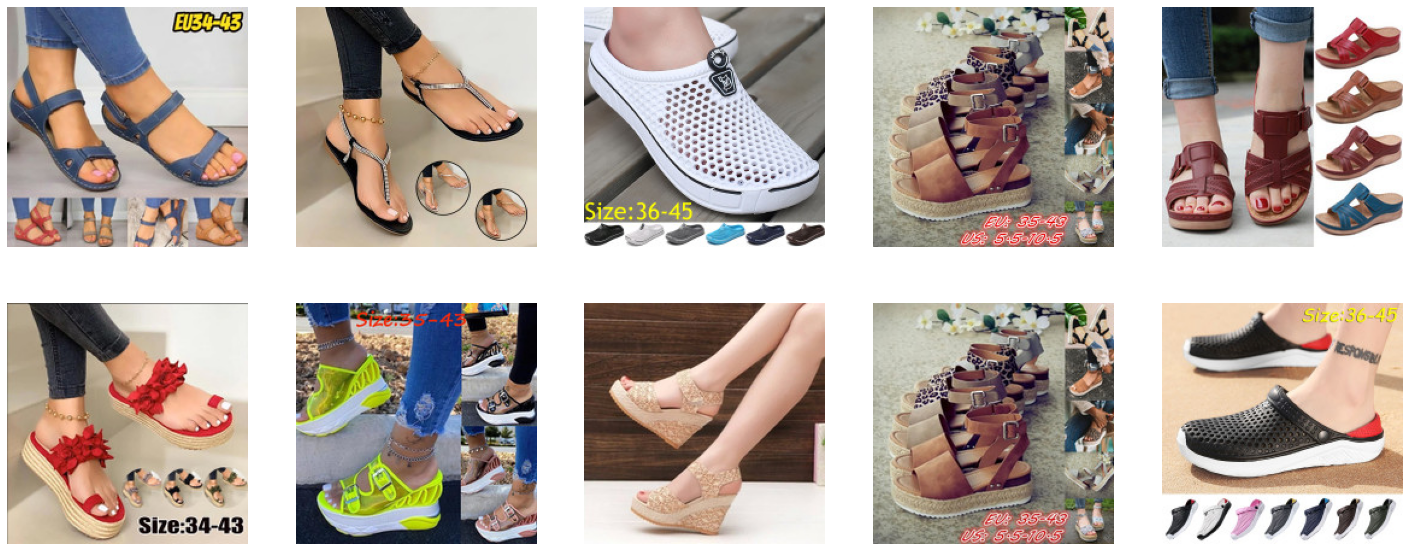

,discounted(tokens matched),discounted(sandal),tokens matched,sandal,0
136,0.988069,0.988069,1,True,"Femmes Casual Round Open Toe Sandals Female Slippers Vintage Orthopedic Buckle Strap Anti-slip Respirant Summer Beach Sandals Roman Gladiator|Women Casual Round Open Toe Sandals Female Slippers Vintage Orthopedic Buckle Strap Anti-slip Breathable Summer Beach Sandals Roman Gladiator|slidesforwomen,sandalendamen,Sandals,Platform Shoes,Summer,Vintage,sandalswomen,Buckles,summer shoes,Women's Fashion,flatshoesforwoman,sandalefemme,sandaliasmujer,Roman,open toe,Casual,Women,Beach,wedgesshoeswomen,Slippers,slippers for women|grey"
139,0.988069,0.988069,1,True,"2020 nouvelles femmes d'été loisirs vacances chaussures plates forage chaud tongs sandales|2020 New Women's Summer Leisure Holiday Flat Shoes Hot Drilling Flip-flops Sandals|Summer,Flip Flops,hotrhinestone,Womens Shoes,Vacation,new2020,Slippers,flipflopsandal,Sandals,Shoes,casualsandal,Holiday,flat shoe|silver"
191,0.988069,0.988069,1,True,"2019 Chaussures de plage d'été Couple Sandales Ventilatives Chaussures Casual Chaussures Chaussures Chaussons|2019 Summer Beach Shoes Couple Ventilative Sandals Casual Shoes Slippers|Summer,Flip Flops,Outdoor,Breathable,Slippers,unisex,Fashion,Shoes,Sandals,Sport,Beach,Casual|black"
215,0.988069,0.988069,1,True,"2019 Femmes Open Toe orteil Braid Braid Strap Strap Strap Platform Sandales Sandales Ajustable Boucle Boucle Semelle Rubble Semelle Rubble Chaussures d'été Cute Espadrille|2019 Women Open Toe Ankle Braid Strap Straw Platform Sandals Adjustable Buckle Wedge Rubble Sole Summer Shoes Cute Espadrille|wedge,Sandals,Summer,antislip,espadrille,Slippers,Platform,Women's Fashion,open toe,cute,Shoes,Ankle,women shoes,Braids,Beach,Buckles,Women|leopard"
403,0.988069,0.988069,1,True,"Women Summer New Flip Flops Sandals Beach Shoes Slipper Shoes Comfortable Open Toe Sandals Vintage Anti-slip Breathable Summer Casual Shoes Plus Size |Women Summer New Flip Flops Sandals Beach Shoes Slipper Shoes Comfortable Open Toe Sandals Vintage Anti-slip Breathable Summer Casual Shoes Plus Size |Summer,Flip Flops,Sandals,Vintage,antislip,Slippers,Women's Fashion,open toe,Shoes,Plus Size,Beach,Casual,Women|red"
675,0.988069,0.988069,1,True,"NOUVEAU Mode Femmes Fleur Slip Sur Plate-Forme Sandales Pantoufles Chaussures De Plage Cales Sandales D'été Casual Chaussures Plus La Taille|NEW Fashion Women Flower Slip On Platform Sandals Slippers Beach Shoes Wedges Sandals Summer Casual Shoes Plus Size|beach shoes,fashion women,Plus Size,Women Sandals,Fashion,bohemiasandal,Beach,Flowers,platformsandal,wedgessandal,nonslipslipper,womenshoessummer,sandals for women,Sandals,Summer,Shoes,Women,Women's Fashion,Casual,Slippers,slippers for women|grey"
825,0.988069,0.988069,1,True,"2020 nouveau 3 couleurs mode femmes pantoufles creux sandales compensées d'été patchwork pantoufles pantoufles augmentées|2020 New 3 Colors Fashion Female Slippers Hollow Wedge Sandals Summer Patchwork Slippers Increased Slippers|heightenedshoe,wedge,Sandals,casual shoes,High Heel,Slippers,Women's Fashion,Fashion,Summer,Wedge Sandals|black"
981,0.988069,0.988069,1,True,"Femmes Chaussures D'été Nouveau À Bout Ouvert Poisson Tête Plate-Forme Sandales De Mode Talons Hauts Compensées Sandales|Women Shoes Summer New Open Toe Fish Head Platform Sandals Fashion High Heels Wedges Sandals|beach shoes,sandalendamen,Sandals,Fashion,Womens Shoes,Summer,sandalswomen,summer shoes,platformsandal,wedgessandal,sandalefemme,Women's Fashion,open toe,High Heel,Women,Head,fish,Heels,Shoes|beige"
1084,0.988069,0.988069,1,True,"Femmes d'été décontracté plate-forme sandales compensées à bout ouvert chaussures bride à la cheville sandales grande taille 35-43|Women Summer Casual Platform Wedge Sandals Open Toe Shoes Ankle Strap Sandals Plus Size 35-43|wedge,sandals for women,Sandals,Platform Shoes,Womens Shoes,Summer,Plus Size,Women's Fashion,espadrille,sandaliasfeminina,open toe,Shoes,Ankle Strap,Ankle,Wedge Sandals,Casual,W

In [413]:
tokens_found_count(merged_product_identifier_text(),['sandal'],top_n=10,verbose=1).head(20) # test results chat

### try out search

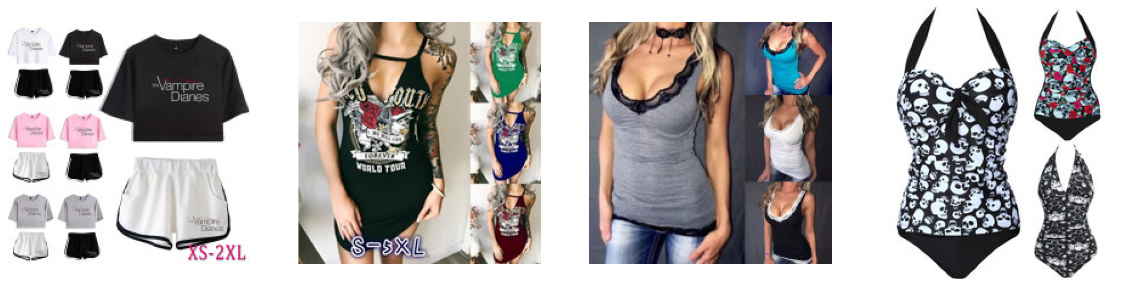

### compute token rarity (rarer tokens should be up-weighted)

In [258]:
tokens_found_count(merged_product_identifier_text(),['harajuku','goth','sexy'],verbose=0)

,tokens_found_count,harajuku,goth,sexy
1307,2,True,False,True
758,2,False,True,True
1183,2,False,True,True
1516,2,False,True,True
172,1,True,False,False
375,1,True,False,False
1362,1,True,False,False
1483,1,True,False,False
1485,1,True,False,False
52,1,False,True,False
